In [17]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load the data
train = pd.read_csv('../../data/patient_embeddings_train.csv') #TODO for Pascal
test = pd.read_csv('../data/patient_embeddings_test.csv') #TODO for Pascal

/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


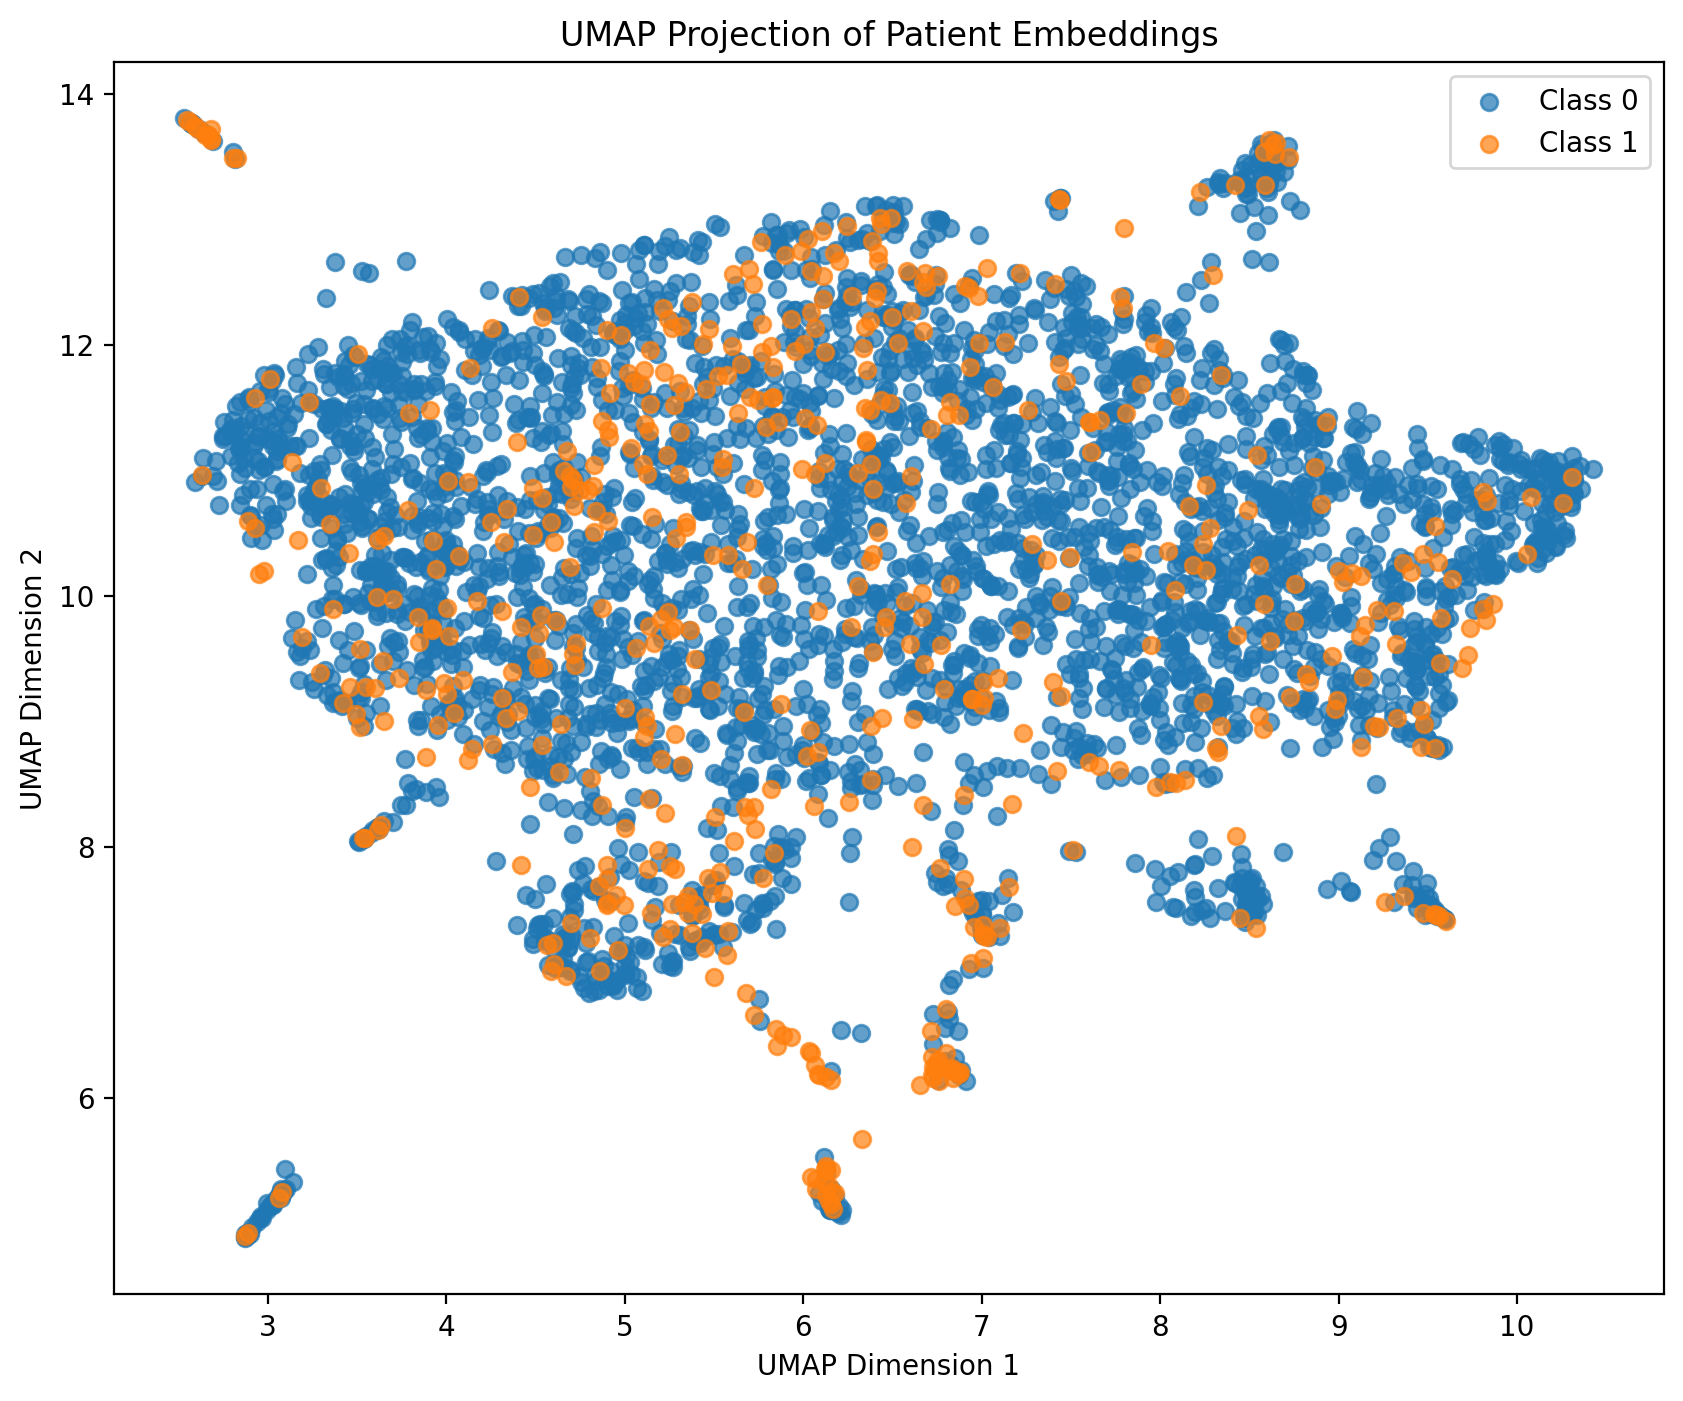

Silhouette Score: 0.03581668809056282


In [19]:
# Perform UMAP dimensionality reduction on training data
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(train.drop('label', axis=1))

# Plot the 2D UMAP projection
plt.figure(figsize=(10, 8))
for label in train['label'].unique():
    mask = train['label'] == label
    plt.scatter(
        embedding_2d[mask, 0],
        embedding_2d[mask, 1],
        label=f"Class {int(label)}",
        alpha=0.7
    )
plt.title("UMAP Projection of Patient Embeddings")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.show()

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(embedding_2d, train['label'])
print(f"Silhouette Score: {silhouette_avg}")

/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


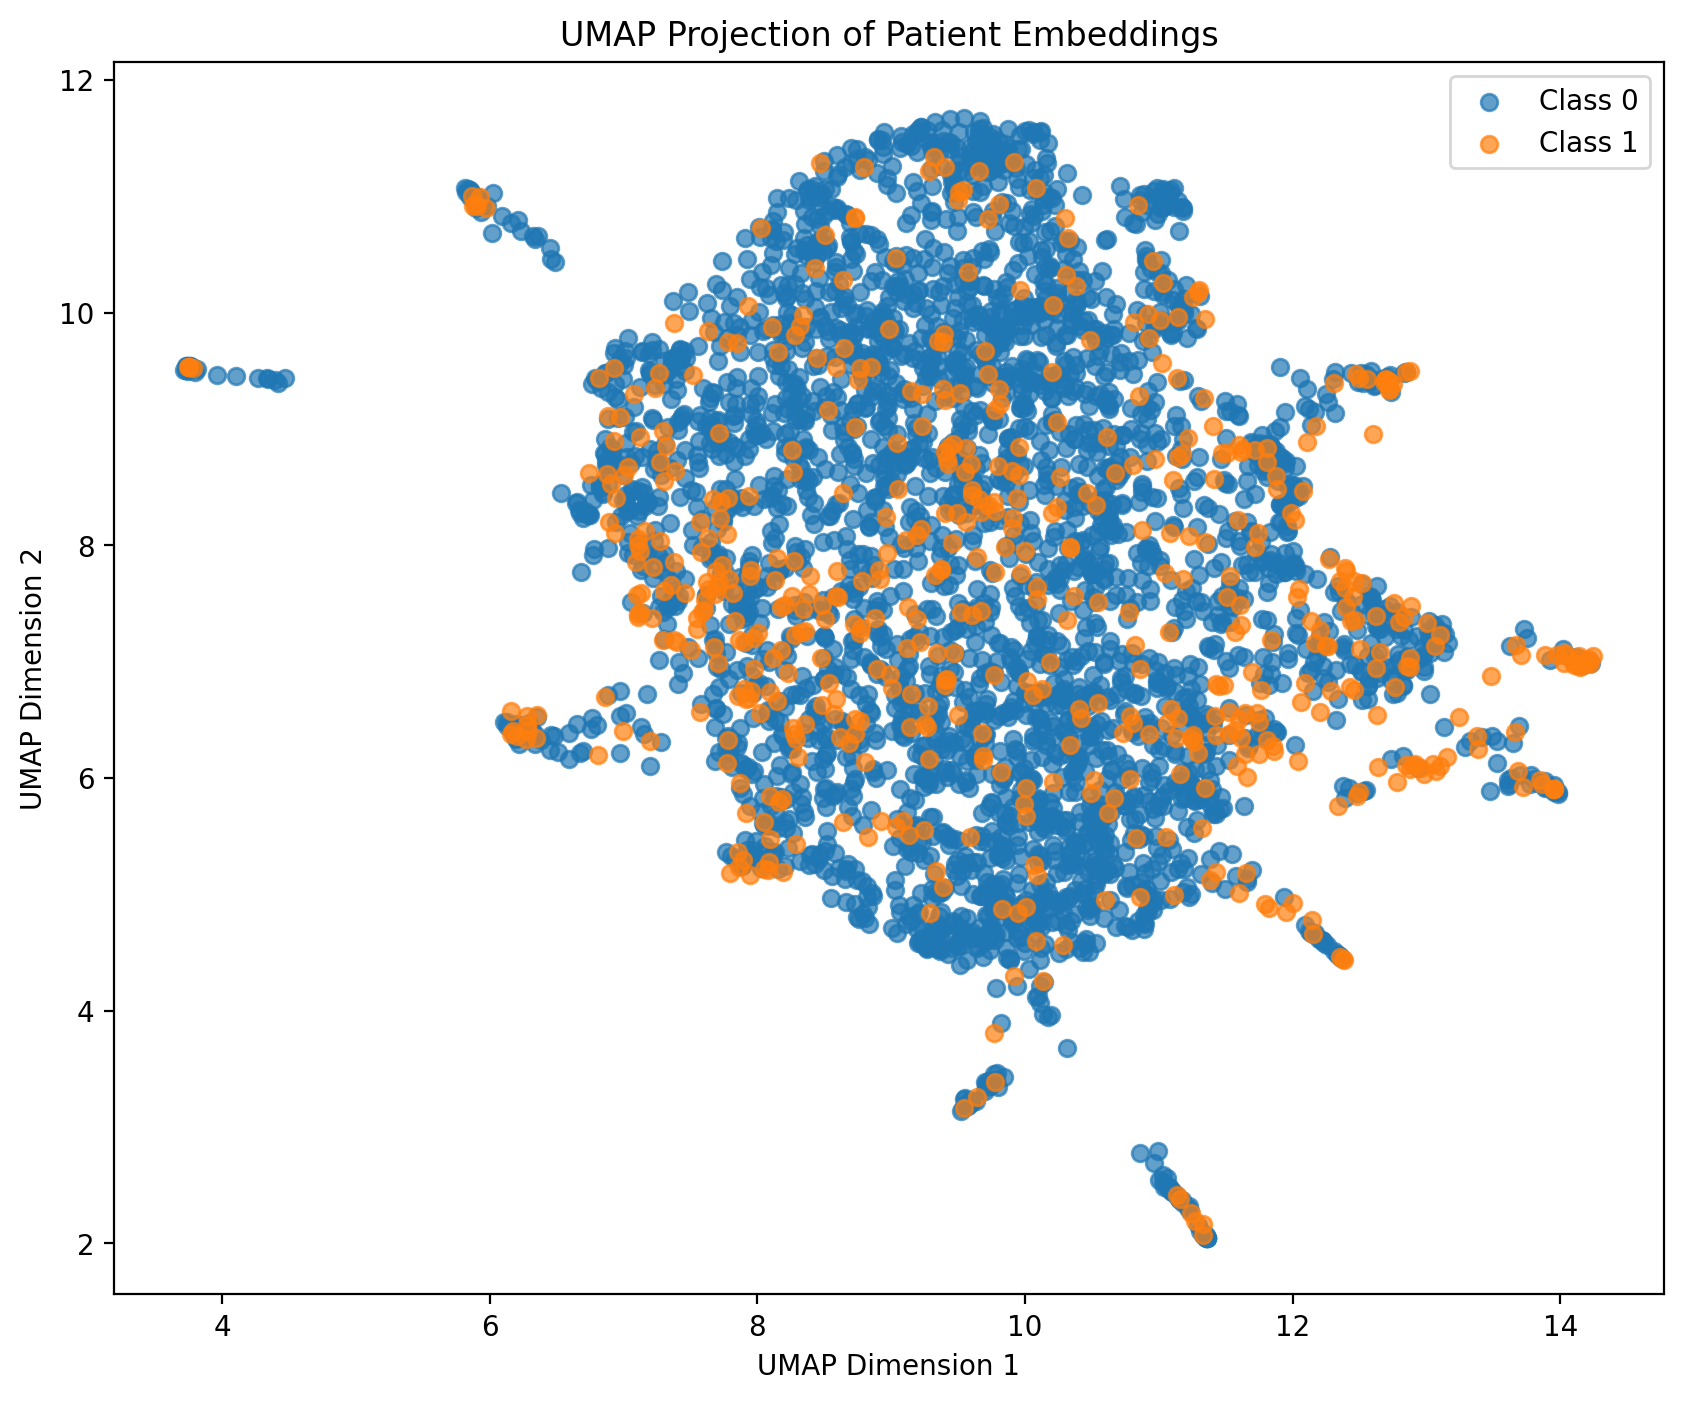

Silhouette Score: -0.009607460349798203


In [20]:
# Perform UMAP dimensionality reduction on training data
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding_2d = reducer.fit_transform(test.drop('label', axis=1))

# Plot the 2D UMAP projection
plt.figure(figsize=(10, 8))
for label in test['label'].unique():
    mask = test['label'] == label
    plt.scatter(
        embedding_2d[mask, 0],
        embedding_2d[mask, 1],
        label=f"Class {int(label)}",
        alpha=0.7
    )
plt.title("UMAP Projection of Patient Embeddings")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.show()

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(embedding_2d, train['label'])
print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
# Create a dictionary to store results
results = []

# Parameters to try
n_neighbors_list = [5, 15, 30, 50]
min_dist_list = [0.0, 0.1, 0.5, 1.0]

# Try different combinations of parameters
for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:
        # Create and fit UMAP
        reducer = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
            n_components=2,
            random_state=42
        )
        
        # Fit and transform the training data
        embedding_2d = reducer.fit_transform(train.drop('label', axis=1))
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(embedding_2d, train['label'])
        
        # Store results
        results.append({
            'n_neighbors': n_neighbors,
            'min_dist': min_dist,
            'silhouette_score': silhouette_avg
        })
        
        print(f"n_neighbors={n_neighbors}, min_dist={min_dist}: Silhouette Score = {silhouette_avg:.4f}")

# Find best parameters
best_result = max(results, key=lambda x: x['silhouette_score'])
print("\nBest parameters:")
print(f"n_neighbors: {best_result['n_neighbors']}")
print(f"min_dist: {best_result['min_dist']}")
print(f"Silhouette Score: {best_result['silhouette_score']:.4f}")

/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=5, min_dist=0.0: Silhouette Score = 0.0673


/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=5, min_dist=0.1: Silhouette Score = 0.0562


/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=5, min_dist=0.5: Silhouette Score = 0.0251


/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors=5, min_dist=1.0: Silhouette Score = 0.0329


/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


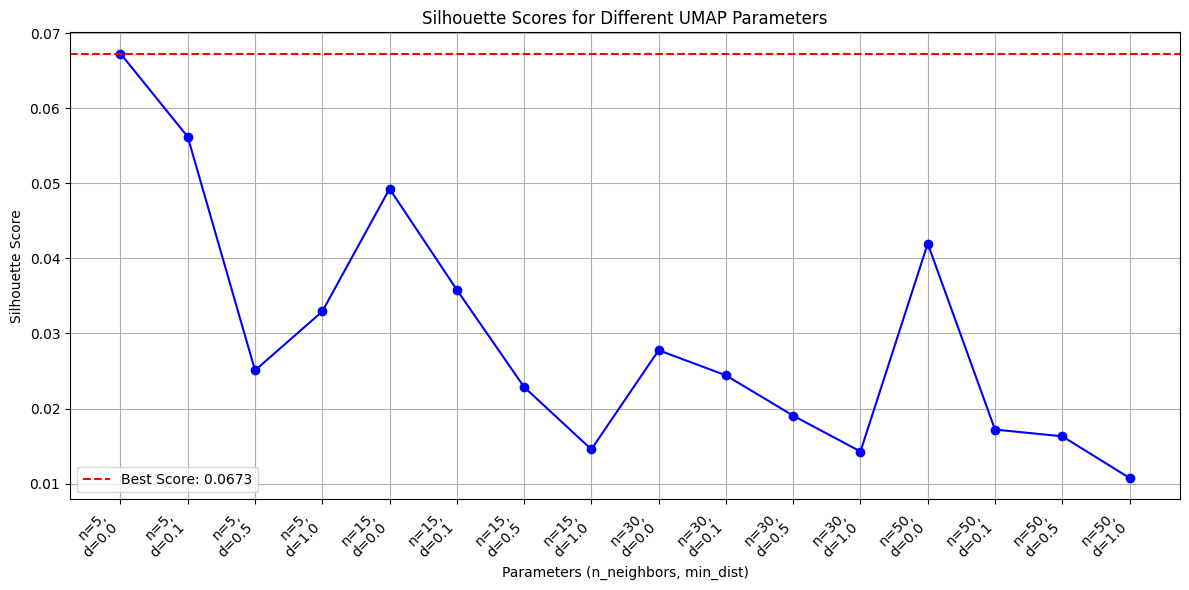

In [ ]:
# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Create x-axis labels combining n_neighbors and min_dist
x_labels = [f'n={r["n_neighbors"]},\nd={r["min_dist"]}' for r in results]

# Plot silhouette scores
plt.plot(x_labels, [r['silhouette_score'] for r in results], 'bo-')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.title('Silhouette Scores for Different UMAP Parameters')
plt.xlabel('Parameters (n_neighbors, min_dist)')
plt.ylabel('Silhouette Score')

# Add horizontal line for best score
best_score = best_result['silhouette_score']
plt.axhline(y=best_score, color='r', linestyle='--', 
            label=f'Best Score: {best_score:.4f}')
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/asvozi/miniconda3/envs/ml4hc/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


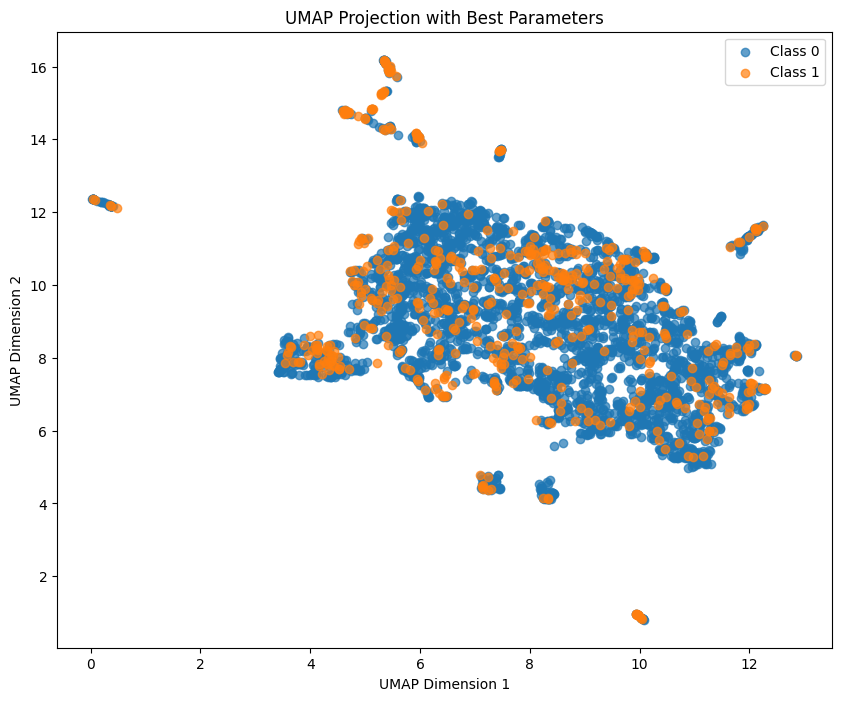

Silhouette Score with best parameters: 0.0673


In [ ]:
# Create and fit UMAP with best parameters
reducer = umap.UMAP(
    n_neighbors=best_result['n_neighbors'],
    min_dist=best_result['min_dist'],
    n_components=2,
    random_state=42
)

# Fit and transform the training data
embedding_2d = reducer.fit_transform(train.drop('label', axis=1))

# Plot the 2D UMAP projection
plt.figure(figsize=(10, 8))
for label in train['label'].unique():
    mask = train['label'] == label
    plt.scatter(
        embedding_2d[mask, 0],
        embedding_2d[mask, 1],
        label=f"Class {int(label)}",
        alpha=0.7
    )
plt.title("UMAP Projection with Best Parameters")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.show()

# Print the silhouette score
silhouette_avg = silhouette_score(embedding_2d, train['label'])
print(f"Silhouette Score with best parameters: {silhouette_avg:.4f}")